In [1]:
from viz import graph
from pathlib import Path
import pandas as pd
from filter import cleaners
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
current_directory = Path.cwd()
df = pd.read_csv(current_directory/'data'/'survey_results_public.csv')

In [2]:
language = cleaners(df, "LanguageHaveWorkedWith") 
database = cleaners(df, "DatabaseHaveWorkedWith")
platform = cleaners(df, "PlatformHaveWorkedWith")
web_framework = cleaners(df, "WebframeHaveWorkedWith")
development_tools = cleaners(df, "ToolsTechHaveWorkedWith")
#-------------------------------------------------------------
misc = cleaners(df, "MiscTechHaveWorkedWith")
ai = cleaners(df, "AISearchDevHaveWorkedWith")
emp = cleaners(df, "Employment")

In [3]:
emp = cleaners(df, "Employment")

In [4]:
fig1 = graph(language,type="language",n=15)
fig2 = graph(database,type="database",n=15)
fig3 = graph(web_framework,type="webframe",n=15)
fig4 = graph(platform,type="webframe",n=15)

combined_fig = make_subplots(rows=2, cols=2, subplot_titles=["databases", "Databases", "Web Frameworks","Platforms"],  vertical_spacing=0.08)
combined_fig.update_layout(
    width=1850,  
    height=1000,
    title_text="Combined Subplots"
)
or_rd_colors = px.colors.sequential.OrRd
def add_figure_to_subplot(fig, row, col, colors):
 
    
    for trace, color in zip(fig.data, colors):
        trace.update(marker_color=color)  
        combined_fig.add_trace(trace, row=row, col=col)

# 
add_figure_to_subplot(fig1, row=1, col=1, colors=["#cb181d"])
add_figure_to_subplot(fig2, row=1, col=2, colors=["#ef3b2c"])
add_figure_to_subplot(fig3, row=2, col=1, colors=["#fb6a4a"])
add_figure_to_subplot(fig4, row=2, col=2, colors=["#fc9272"])

combined_fig.show()

In [5]:

bar_graph = ai.copy()
num_records = bar_graph.shape[0]

columns_to_drop = ["Unnamed: 0", "ResponseId", "DevType", "Country"]
bar_graph = bar_graph.drop(columns = bar_graph.columns.intersection(columns_to_drop))
bar_graph = bar_graph.count().reset_index()
bar_graph.columns = ['Language', 'Value']
bar_graph["Avg"] = round((bar_graph["Value"] / num_records) * 100, 2)
bar_graph = bar_graph.sort_values(by="Value",ascending=False)
bar_graph = bar_graph.head(7)
bar_graph.set_index('Language', inplace=True)

In [6]:
development_jobs = [
        "Developer, full-stack",
        "Developer, back-end",
        "Developer, front-end",
        "Developer, desktop or enterprise applications",
        "Developer, mobile",
        "Developer, game or graphics",
        "Developer, embedded applications or devices",
        "Developer, QA or test",
        "Blockchain",
        "Developer Experience",
        "Developer Advocate"
        ]

data_ml_jobs = [
        "Data scientist or machine learning specialist",
        "Data or business analyst",
        "Data engineer",
        "Database administrator",
        "Developer, AI",
        "Marketing or sales professional",
        "Developer, AI"
        ]

q1_df = df.dropna(subset="DevType")

dev_peeps = q1_df[q1_df["DevType"].isin(development_jobs)]
data_peeps = q1_df[q1_df["DevType"].isin(data_ml_jobs)]


In [7]:
dev_lang = cleaners(dev_peeps, "LanguageHaveWorkedWith",dash=False)
dev_dbase = cleaners(dev_peeps, "DatabaseHaveWorkedWith",dash=False)
dev_wframe = cleaners(dev_peeps, "WebframeHaveWorkedWith",dash=False)

data_lang = cleaners(data_peeps, "LanguageHaveWorkedWith",dash=False)
data_dbase = cleaners(data_peeps, "DatabaseHaveWorkedWith",dash=False)
data_misc = cleaners(data_peeps, "MiscTechHaveWorkedWith",dash=False)


In [8]:
data_misc =  data_misc.sum().reset_index()
data_misc.columns = ['Language', 'Value']
data_misc["Type"] = "Framework"
data_misc=data_misc.sort_values(by="Value",ascending=False).head(3)

data_lang =  data_lang.sum().reset_index()
data_lang.columns = ['Language', 'Value']
data_lang["Type"] = "Language"
data_lang=data_lang.sort_values(by="Value",ascending=False).head(3)

data_dbase =  data_dbase.sum().reset_index()
data_dbase.columns = ['Language', 'Value']
data_dbase["Type"] = "Database"
data_dbase=data_dbase.sort_values(by="Value",ascending=False).head(3)

In [9]:
dev_wframe = dev_wframe.sum().reset_index()
dev_wframe.columns = ['Language', 'Value']
dev_wframe["Type"] = "Framework"
dev_wframe = dev_wframe.sort_values(by="Value", ascending=False).head(3)

dev_lang = dev_lang.sum().reset_index()
dev_lang.columns = ['Language', 'Value']
dev_lang["Type"] = "Language"
dev_lang = dev_lang.sort_values(by="Value", ascending=False).head(3)

dev_dbase = dev_dbase.sum().reset_index()
dev_dbase.columns = ['Language', 'Value']
dev_dbase["Type"] = "Database"
dev_dbase = dev_dbase.sort_values(by="Value", ascending=False).head(3)


In [10]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3, shared_yaxes=True)

fig.add_trace(
    go.Bar(x=data_lang.Language, y=data_lang.Value, name="Language", marker=dict(color='darkred',cornerradius="30%")), 1, 1
)
fig.add_trace(
    go.Bar(x=data_dbase.Language, y=data_dbase.Value, name="Database", marker=dict(color='orangered',cornerradius="30%")),1,2,
)

fig.add_trace(
    go.Bar(x=data_misc.Language, y=data_misc.Value, name="Library", marker=dict(color='darkorange',cornerradius="30%")),1,3,
)
fig.update_layout(
        width=1000,  
        height=500,
        title={
        'text': "Top Technologies in Data Careers",
        'x': 0.5,    
        'yanchor': 'top',
        'font_size': 20  
    },
    font=dict(
        family="Arial" ,
        size=12
    )
)
fig.show()

In [11]:
fig = make_subplots(rows=1, cols=3, shared_yaxes=True)

fig.add_trace(
    go.Bar(x=dev_lang.Language, y=dev_lang.Value, name="Language", marker=dict(cornerradius=30)), 1, 1
)
fig.add_trace(
    go.Bar(x=dev_dbase.Language, y=dev_dbase.Value, name="Database", marker=dict(cornerradius="30%")),
    1,
    2,
)

fig.add_trace(
    go.Bar(x=dev_wframe.Language, y=dev_wframe.Value, name="Library", marker=dict(cornerradius="30%")),
    1,
    3,
)


fig.show()

In [12]:
for item in emp.columns:
    print(item)

ResponseId
DevType
Country
ConvertedCompYearly
Employed, full-time
Student, full-time
Not employed, but looking for work
Independent contractor, freelancer, or self-employed
Not employed, and not looking for work
Student, part-time
Employed, part-time
I prefer not to say
Retired


In [13]:
emp.shape

(65437, 13)

In [14]:
new_emp = emp.dropna(subset="ConvertedCompYearly")

In [15]:

new_emp = emp.dropna(subset="ConvertedCompYearly")
# Provide a list of column names where rows will be dropped if any of the specified columns contain the value 1.
columns_to_check = [
    "Student, full-time",                           # Indicates if the individual is a full-time student
    "Not employed, but looking for work",           # Indicates if the individual is not employed but actively seeking employment
    "Not employed, and not looking for work",       # Indicates if the individual is not employed and not seeking employment
    "Student, part-time",                           # Indicates if the individual is a part-time student                       
]

# Create a boolean mask where any of the specified columns have a value of 1
mask = new_emp[columns_to_check].eq(1).any(axis=1)

# Drop rows where any of the specified columns have a value of 1
filtered_emp = new_emp[~mask]

# Verify the shape of the filtered DataFrame
q2 = filtered_emp.loc[:,["DevType","ConvertedCompYearly","Country"]]

In [16]:
# Define the minimum daily salary in PHP
daily_salary_php = 600  # Minimum daily wage in PHP

# Number of working days per year (assuming 252 working days)
working_days_per_year = 252

# Calculate the yearly salary in PHP
yearly_salary_php = daily_salary_php * working_days_per_year

# Define the exchange rate from PHP to USD
exchange_rate = 56.16  # Its 56.16 as of 9/5/2024 

# Convert the yearly salary from PHP to USD and use it as threshhold to filter the anomalies or misinputted data
threshold = yearly_salary_php / exchange_rate

# Filter out rows where 'ConvertedCompYearly' is less than the threshold
q2 = q2[q2["ConvertedCompYearly"] >= threshold]

#----------------------------------------------------------------------------

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = q2["ConvertedCompYearly"].quantile(0.25)
Q3 = q2["ConvertedCompYearly"].quantile(0.75)

# Compute the IQR
IQR = Q3 - Q1

# Define the bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
removed = q2[(q2["ConvertedCompYearly"] >= lower_bound) & (q2["ConvertedCompYearly"] <= upper_bound)]
removed

,DevType,ConvertedCompYearly,Country
374,Academic Researcher,30074.0,Austria
379,Data Science/ML,91295.0,Turkey
385,Back-End Developer,53703.0,France
392,Project Manager,161044.0,United Kingdom
395,Others,121018.0,United Kingdom
...,...,...,...
41179,Back-End Developer,15600.0,Ukraine
41180,Software Engineer,44640.0,Sweden
41184,Project Manager,170000.0,United States
41185,Full-Stack Developer,116844.0,United States


In [17]:
q2 = removed.groupby("DevType")["ConvertedCompYearly"].agg(['median','min','max','count']).reset_index()
q2

,DevType,median,min,max,count
0,Academic Researcher,55779.5,2957.0,200550.0,284
1,Back-End Developer,69814.0,2700.0,222000.0,4082
2,Blockchain Developer,86163.0,4041.0,215000.0,68
3,Cloud Engineer,93628.0,3235.0,215000.0,238
4,Cyber Security,77869.5,3589.0,221713.0,84
5,Data Analyst,59936.0,5572.0,200000.0,174
6,Data Engineer,77332.0,2700.0,222834.0,503
7,Data Science/ML,74394.0,3000.0,215000.0,354
8,Databases Administrator,87262.0,2759.0,200000.0,50
9,DevOps Engineer,77000.0,2839.0,215000.0,423


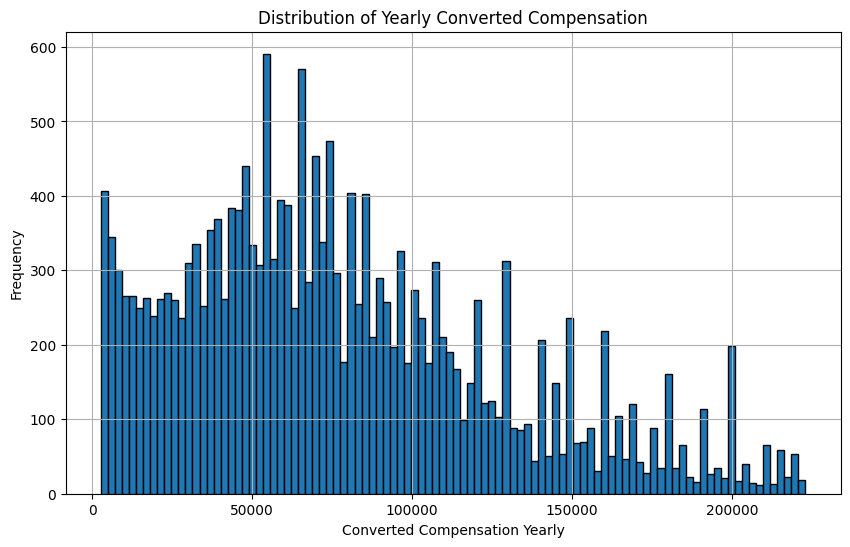

In [18]:
#sns.displot(q2, x="ConvertedCompYearly", bins=20)
import matplotlib.pyplot as plt

# Plot a histogram of the 'ConvertedCompYearly' column
plt.figure(figsize=(10, 6))
plt.hist(removed["ConvertedCompYearly"].dropna(), bins=100, edgecolor='black')
plt.title('Distribution of Yearly Converted Compensation')
plt.xlabel('Converted Compensation Yearly')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [19]:
q2.shape

(24, 5)

In [40]:
q2 = q2.sort_values(by='median', ascending=True)
fig = px.bar(q2,
            y='DevType',
            x='median',
            title='Pangas',
            color='median',  
            color_continuous_scale='OrRd',
            template='plotly_dark',
            text='median',
            hover_data={'DevType': True, 'median': True, 'min': True, 'max': True, 'count': True}
            )  
fig.update_traces(textposition='outside', 
                textfont_size=14, 
                textfont_color='black',
                customdata=q2[['min','max','count']],
                hovertemplate=(
        '<span style="font-size:18px;"><b>%{y}</b></span>'  
        '<br>median : $%{x}<br>'
        '      min : $%{customdata[0]:,}<br>' 
        '     max : $%{customdata[1]:,}<br>'  
        '   count : %{customdata[2]}'  
    ),
                hoverlabel=dict(
                    font_size=16,    
                    font_family="Arial",
                                )
                )
# Maangas na Layout
fig.update_layout(
    title={
        'text': 'Salary Ranges by Tech Role',
        'font_size': 32,  
        'font_family': 'Arial',  
        'font_color': 'black',  
        'font_weight': 'normal'  
    },
    xaxis_title='',         
    yaxis_title='',  
    xaxis=dict(
        tickvals=[],       
        ticktext=[],       
        showgrid=False,    
        zeroline=False    
    ),
    yaxis=dict(
        tickfont=dict(size=18, color='black', family = 'Arial'),
        ),

    plot_bgcolor='white', 
    paper_bgcolor='white', 
    title_x=0.5,
    width=1350,  
    height=1000,
    coloraxis_colorbar=dict(
        tickfont=dict(
            size=15,        
            color='Black', 
            family='Arial',
            weight = "normal"
        )

    )
)

In [41]:
tast = q2.loc[:,["DevType","median","min","max"]]
tast

,DevType,median,min,max
22,System Administrator,53703.0,3000.0,166000.0
10,Front-End Developer,55285.0,2782.0,222929.0
0,Academic Researcher,55779.5,2957.0,200550.0
15,Mobile App Developer,59316.0,2725.0,222929.0
19,QA Engineer,59695.5,2871.0,195000.0
5,Data Analyst,59936.0,5572.0,200000.0
12,Game Developer,60000.0,2876.0,220000.0
20,Sales Professional,60109.0,9274.0,214812.0
11,Full-Stack Developer,65424.0,2695.0,222834.0
1,Back-End Developer,69814.0,2700.0,222000.0
